### 선형회귀 모델에 대한 GrandientDescentOptimizer 활용

- 1개의 값씩 훈련을 시키는 코드

In [88]:
import tensorflow as tf
import numpy as np

# Our real model of y = 2 * x + 6
def y_real(x):
    return tf.mul(x, 2) + 6

# Our model of y = w * x + b
def y_model(x, w, b):
    return tf.mul(x, w) + b 

# x and y are placeholders for our training data
x = tf.placeholder("float")

# w and b are the variables storing our values. It is initialised with starting "guesses"
w = tf.Variable(1.0, name="w")
b = tf.Variable(1.0, name="b")

# Our error is defined as the square of the differences
error = tf.square(y_real(x) - y_model(x, w, b))

# The Gradient Descent Optimizer does the heavy lifting
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

# Normal TensorFlow - initialize values, create a session and run the model
model = tf.initialize_all_variables()

errors = []
with tf.Session() as session:
    session.run(model)
    for i in range(2000):
        x_value = np.random.rand()
        _, error_value = session.run([train_op, error], feed_dict={x: x_value})
        errors.append(error_value)
        if i % 100 == 0:
            print "Iteration: {0}, w: {1}, b: {2}".format(i, w.eval(), b.eval())
    
    print "Predicted model: {0}x + {1}".format(w.eval(), b.eval())    

Iteration: 0, w: 1.09470880032, b: 1.11628854275
Iteration: 100, w: 3.0098092556, b: 5.07469415665
Iteration: 200, w: 2.9991941452, b: 5.44047451019
Iteration: 300, w: 2.88800668716, b: 5.54555082321
Iteration: 400, w: 2.80619549751, b: 5.65400075912
Iteration: 500, w: 2.69381070137, b: 5.66528463364
Iteration: 600, w: 2.60500907898, b: 5.70556545258
Iteration: 700, w: 2.51092100143, b: 5.74172258377
Iteration: 800, w: 2.43069624901, b: 5.77385377884
Iteration: 900, w: 2.39865279198, b: 5.81740093231
Iteration: 1000, w: 2.32709956169, b: 5.79252147675
Iteration: 1100, w: 2.29714798927, b: 5.85363101959
Iteration: 1200, w: 2.25430893898, b: 5.8688378334
Iteration: 1300, w: 2.21425652504, b: 5.87602186203
Iteration: 1400, w: 2.19013786316, b: 5.89815664291
Iteration: 1500, w: 2.16285729408, b: 5.90386295319
Iteration: 1600, w: 2.14729189873, b: 5.9225025177
Iteration: 1700, w: 2.12831473351, b: 5.92874097824
Iteration: 1800, w: 2.11293983459, b: 5.9376168251
Iteration: 1900, w: 2.0976483

309


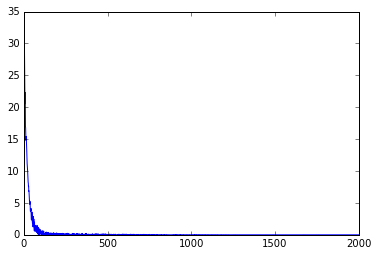

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

error_list = [errors[i] for i in range(len(errors))]
num = 0
for error in error_list:
    if error < 0.00001:
        print num
        break
    num += 1    
plt.plot(error_list)
plt.show()
plt.savefig("errors.png")    

- batch 입력을 적용하여 n개의 값씩 훈련시키는 코드

In [90]:
# Our real model of y = 2 * x + 6
def y_real(x):
    return tf.mul(x, 2) + 6

# Our model of y = w * x + b
def y_model(x, w, b):
    return tf.mul(x, w) + b 

# Batch
batch_size = 2

# x and y are placeholders for our training data
x = tf.placeholder("float", [None, 1])

# w and b are the variables storing our values. It is initialised with starting "guesses"
w = tf.Variable([1.0], name="w")
b = tf.Variable([1.0], name="b")

# Our error is defined as the square of the differences
error = tf.reduce_sum(tf.square(y_real(x) - y_model(x, w, b)))

# The Gradient Descent Optimizer does the heavy lifting
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(error)

# Normal TensorFlow - initialize values, create a session and run the model
model = tf.initialize_all_variables()

errors = []
with tf.Session() as session:
    session.run(model)
    for i in range(2000):
        x_value = np.random.randn(batch_size, 1)
        _, error_value = session.run([train_op, error], feed_dict={x: x_value})
        errors.append(error_value)
        if i % 100 == 0:
            print "Iteration: {0}, w: {1}, b: {2}".format(i, w.eval(), b.eval())
    
    print "Predicted model: {0}x + {1}".format(w.eval(), b.eval())    

Iteration: 0, w: [ 1.3002646], b: [ 1.24757564]
Iteration: 100, w: [ 2.02603269], b: [ 5.91983938]
Iteration: 200, w: [ 2.00092173], b: [ 5.99856377]
Iteration: 300, w: [ 2.00000954], b: [ 5.99998379]
Iteration: 400, w: [ 1.99999988], b: [ 5.99999619]
Iteration: 500, w: [ 1.99999976], b: [ 5.99999619]
Iteration: 600, w: [ 2.00000048], b: [ 5.99999619]
Iteration: 700, w: [ 2.00000024], b: [ 5.99999619]
Iteration: 800, w: [ 1.99999976], b: [ 5.99999619]
Iteration: 900, w: [ 2.], b: [ 5.99999619]
Iteration: 1000, w: [ 2.00000048], b: [ 5.99999619]
Iteration: 1100, w: [ 1.99999988], b: [ 5.99999619]
Iteration: 1200, w: [ 1.99999988], b: [ 5.99999619]
Iteration: 1300, w: [ 2.], b: [ 5.99999619]
Iteration: 1400, w: [ 1.99999976], b: [ 5.99999619]
Iteration: 1500, w: [ 2.00000024], b: [ 5.99999619]
Iteration: 1600, w: [ 1.99999917], b: [ 5.99999619]
Iteration: 1700, w: [ 1.99999988], b: [ 5.99999619]
Iteration: 1800, w: [ 1.9999994], b: [ 5.99999619]
Iteration: 1900, w: [ 2.], b: [ 5.99999619

150


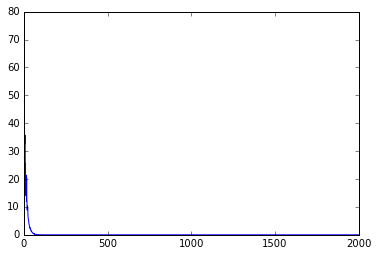

In [91]:
error_list = [errors[i] for i in range(len(errors))]
num = 0
for error in error_list:
    if error < 0.0001:
        print num
        break
    num += 1  
plt.plot(error_list)
plt.show()
plt.savefig("errors.png") 